In [1]:
# Uploading the xlsx files with the combined dataset and metabolites dataset
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

metabolites = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/Deliverables/SG_standarized_metabolites.xlsx')
combined_df = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/Deliverables/statistics_df_D1_2.xlsx')
met_original = metabolites.copy()

Mounted at /content/drive


In [ ]:
combined_df.columns

Index(['8-oxo-dGUO', '8-OH-guanosine', 'Adenosine', 'Anthranilic', 'Cotinine',
       'Dopamine', 'Epinephrine', 'GABA', 'Glutamate', 'Glutamine',
       'Histamine', 'Kynurenic acid', 'Kynurenine', 'Melatonin', 'NNAL',
       'Norepinephrine', 'OH-cotinine', 'Quinolinic acid', 'Serotonin',
       'Tryptophan', 'Xanthurenic acid', 'QA/KA', 'Exposure_Group', 'ID',
       'Gender', 'Weight_kg', 'Height_cm', 'Smokers_in_home',
       'Cigarettes_in_home', 'Cigarettes_outside_home', 'Fruit_veg_days',
       'Fruit_veg_per_day', 'High_fat_diet', 'Exercise_days', 'Env_type',
       'Parents_liv_tog', 'Parents_edu', 'Income', 'BMI', 'Same_edu'],
      dtype='object')

In [2]:
from scipy.stats import kruskal
! pip install scikit-posthocs
import scikit_posthocs as sp
# Initialize a dictionary to store the results
kruskal_results = {
    'Metabolite': [],
    'Kruskal-Wallis H': [],
    'p-value': [],
}

# Filter the DataFrame to exclude ID, Exposure_Group, and Gender columns
metabolites = combined_df.drop(columns=['ID', 'Exposure_Group'])

group_mapping = {0: 'No_TSE', 3: 'TSE_out', 2: 'THS', 1: 'SHS'}

# List to store Dunn's post-hoc results
dunn_results_list = []

# Perform Kruskal-Wallis test for each metabolite
for metabolite in metabolites.columns:  # Exclude ID and Exposure columns
    grouped_data = [group[metabolite].values for name, group in combined_df.groupby('Exposure_Group')]

    # Perform the Kruskal-Wallis test
    H_stat, p_value = kruskal(*grouped_data)

    # Store the results
    kruskal_results['Metabolite'].append(metabolite)
    kruskal_results['Kruskal-Wallis H'].append(H_stat)
    kruskal_results['p-value'].append(p_value)

    # Initialize Dunn's post-hoc results
    dunn_results_row = {}

    # If significant, perform Dunn's post-hoc test
    if p_value < 0.05:
        dunn_results = sp.posthoc_dunn(combined_df, val_col=metabolite, group_col='Exposure_Group', p_adjust='bonferroni')

        # Replace numeric group codes with names from group_mapping
        dunn_results = dunn_results.rename(index=group_mapping, columns=group_mapping)

        # Flatten Dunn's test results and store in the dictionary
        groups = dunn_results.columns.tolist()
        for i in range(len(groups)):
            for j in range(i + 1, len(groups)):
                group1 = groups[i]
                group2 = groups[j]
                p_value = dunn_results.loc[group1, group2]
                comparison_name = f"{group1} vs {group2}"
                dunn_results_row[comparison_name] = p_value

    # Append the dunn results row to the results list
    dunn_results_list.append(dunn_results_row)

# Create a DataFrame from the results
kruskal_results_df = pd.DataFrame(kruskal_results)

# Create DataFrame from Dunn's results
dunn_results_df = pd.DataFrame(dunn_results_list).fillna('')

# Concatenate both results into one DataFrame
final_results_df = pd.concat([kruskal_results_df, dunn_results_df], axis=1)

# Print the results
print(final_results_df)

final_results_df.to_excel('final_results_combined_df.xlsx', index=False)


                 Metabolite  Kruskal-Wallis H       p-value No_TSE vs SHS  \
0                8-oxo-dGUO        123.710196  1.225417e-26           0.0   
1            8-OH-guanosine         68.581676  8.588590e-15      0.000001   
2                 Adenosine         97.191141  6.242617e-21           0.0   
3               Anthranilic        111.468306  5.300609e-24           0.0   
4                  Cotinine        125.629187  4.730102e-27           0.0   
5                  Dopamine        108.379104  2.449867e-23           0.0   
6               Epinephrine        109.149427  1.672551e-23           0.0   
7                      GABA         86.982296  9.740909e-19           0.0   
8                 Glutamate          7.902150  4.807785e-02      0.458239   
9                 Glutamine         16.619132  8.463429e-04      0.006567   
10                Histamine        109.601235  1.337062e-23           0.0   
11           Kynurenic acid         48.635591  1.559559e-10      0.000002   

<ipython-input-3-20235222fe70>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


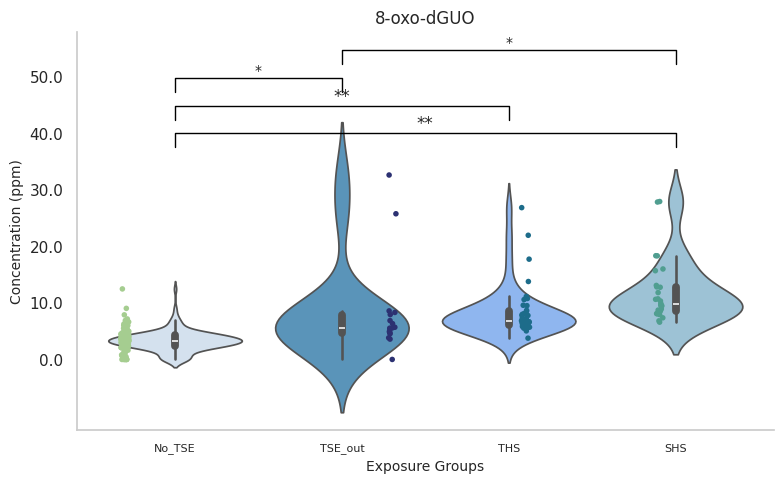

<ipython-input-3-20235222fe70>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


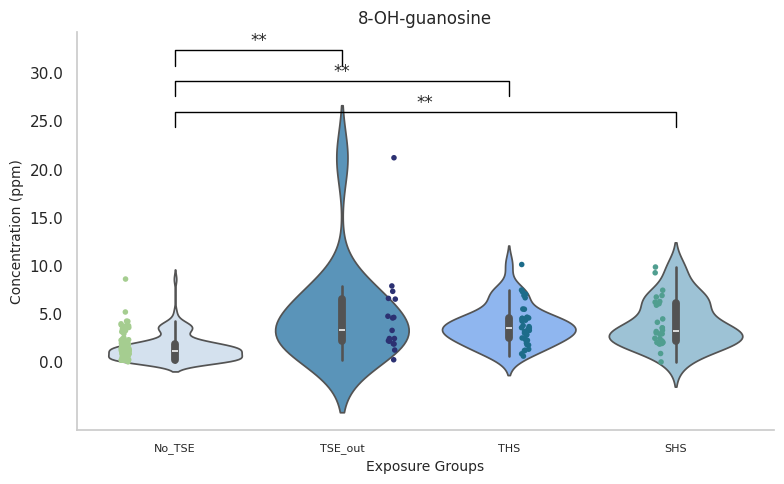

<ipython-input-3-20235222fe70>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


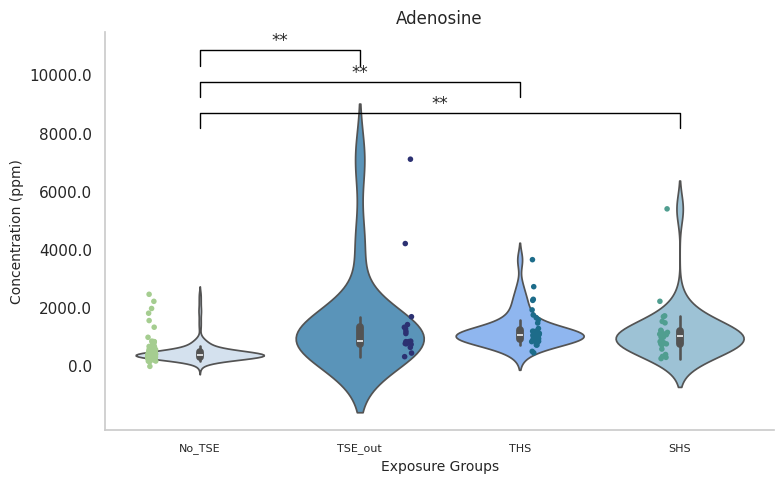

<ipython-input-3-20235222fe70>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


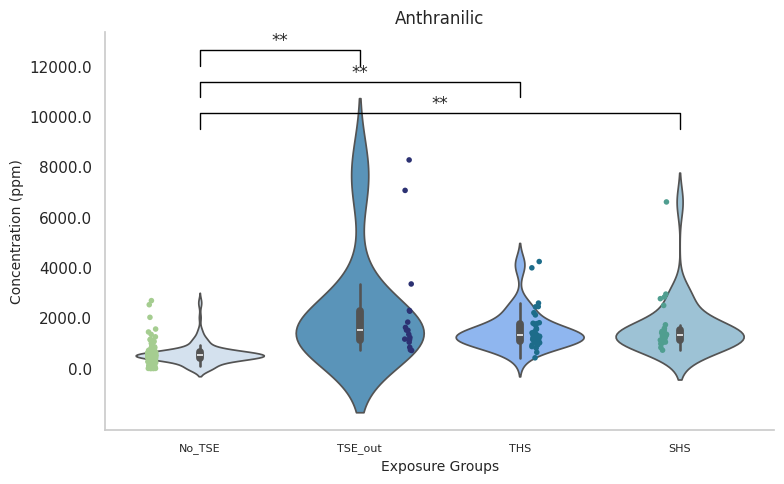

<ipython-input-3-20235222fe70>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


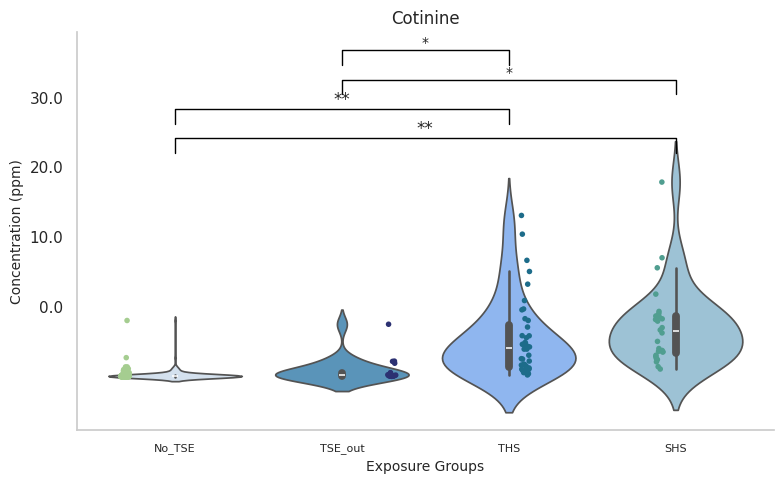

<ipython-input-3-20235222fe70>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


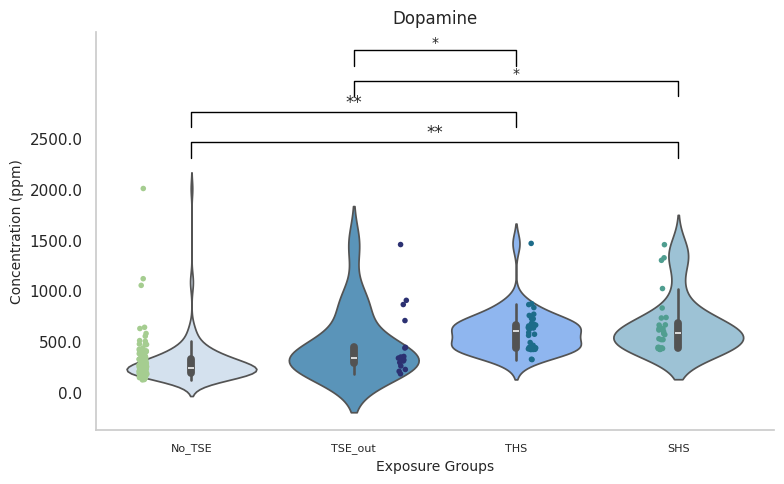

<ipython-input-3-20235222fe70>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


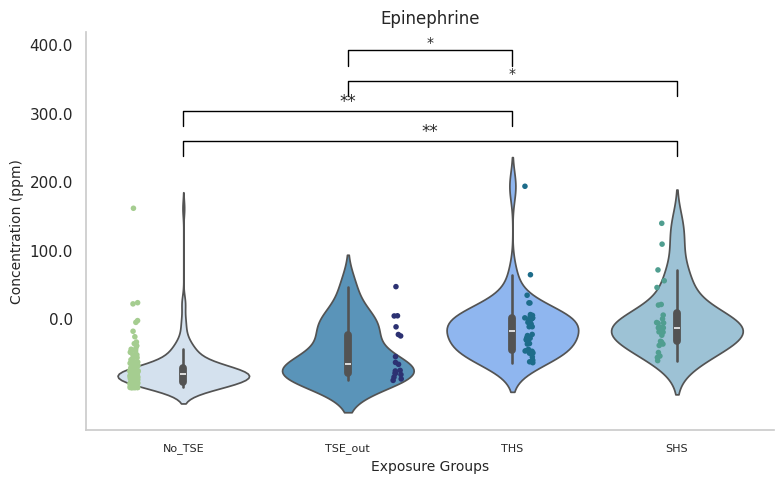

<ipython-input-3-20235222fe70>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


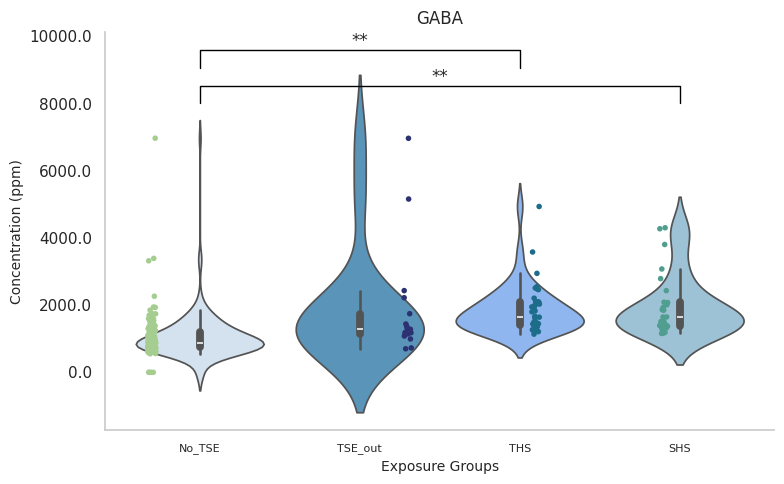

<ipython-input-3-20235222fe70>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


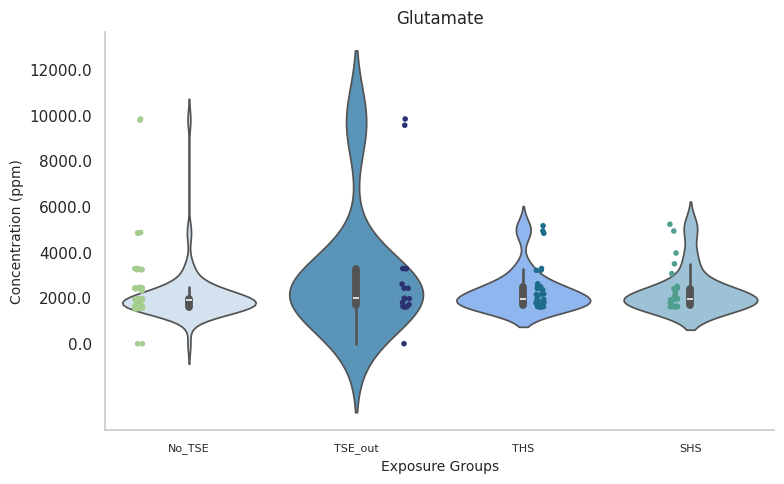

<ipython-input-3-20235222fe70>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


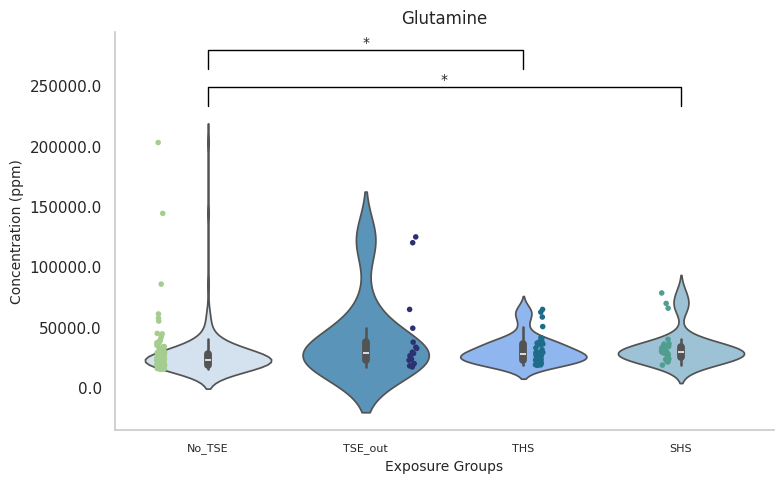

<ipython-input-3-20235222fe70>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


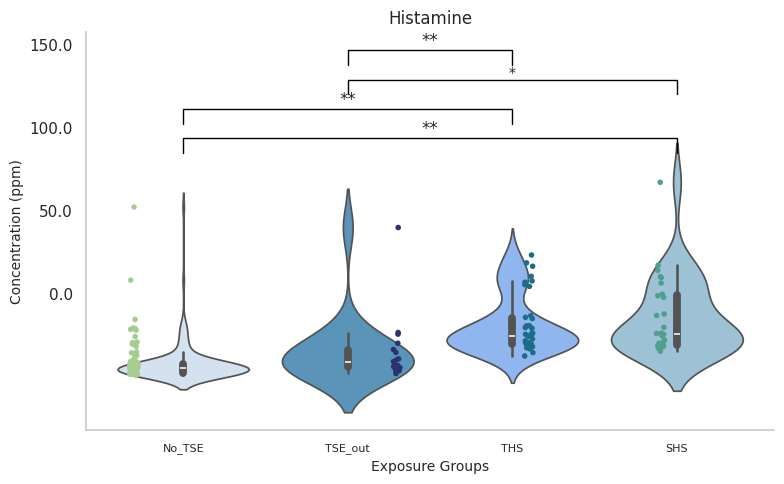

<ipython-input-3-20235222fe70>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


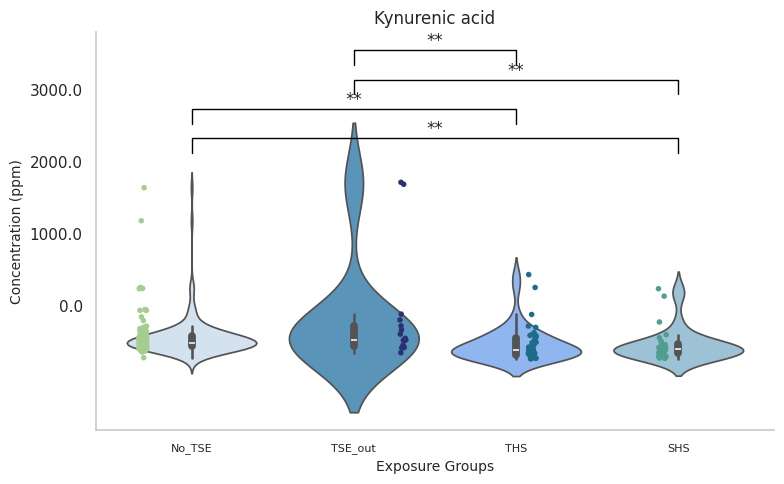

<ipython-input-3-20235222fe70>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


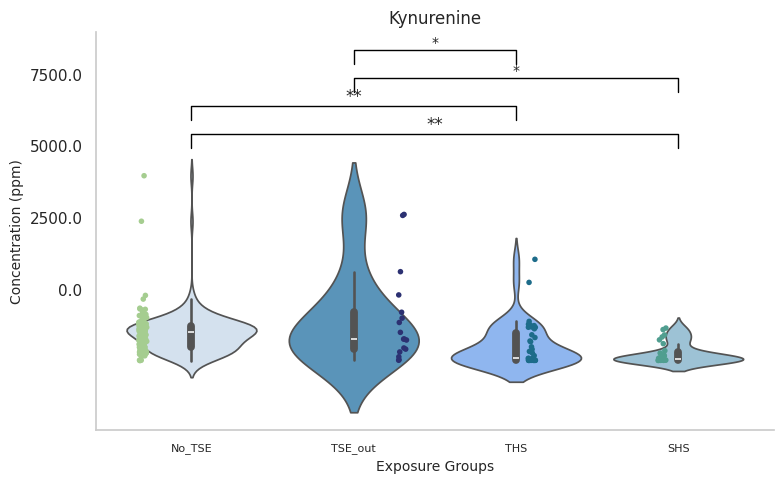

<ipython-input-3-20235222fe70>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


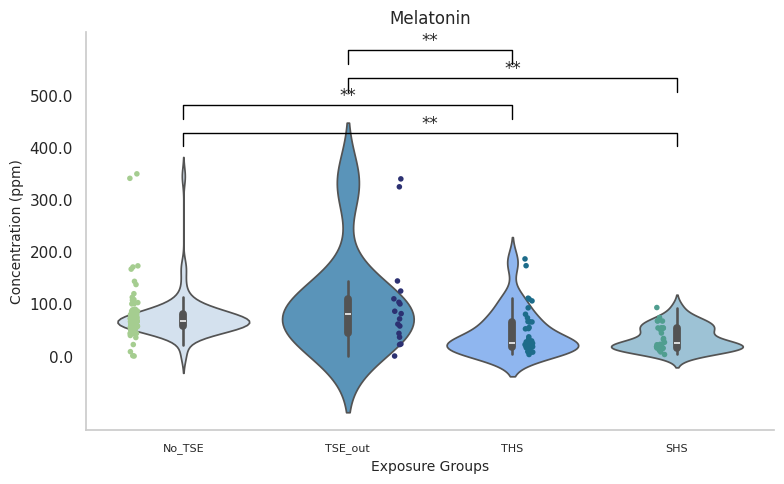

<ipython-input-3-20235222fe70>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


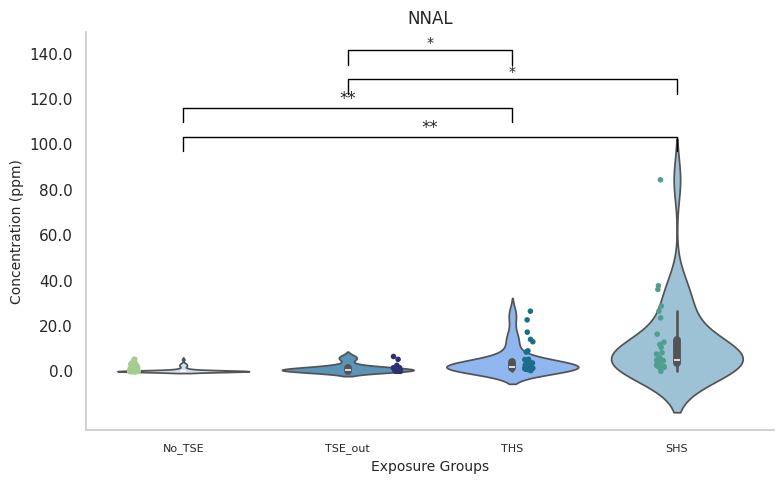

<ipython-input-3-20235222fe70>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


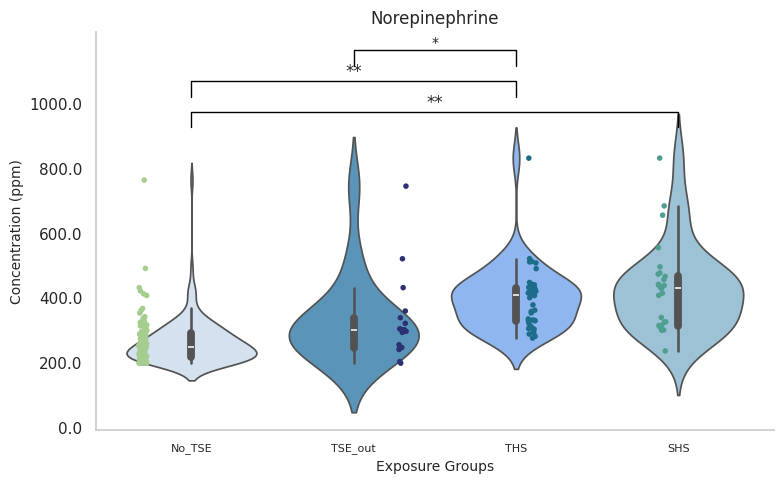

<ipython-input-3-20235222fe70>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


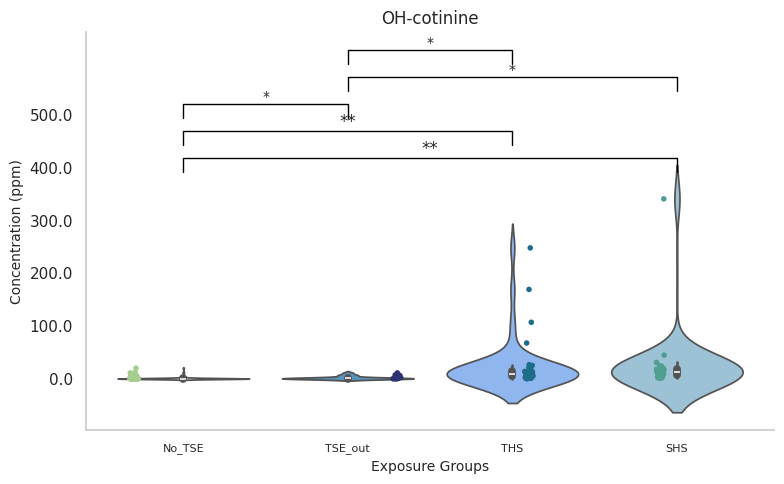

<ipython-input-3-20235222fe70>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


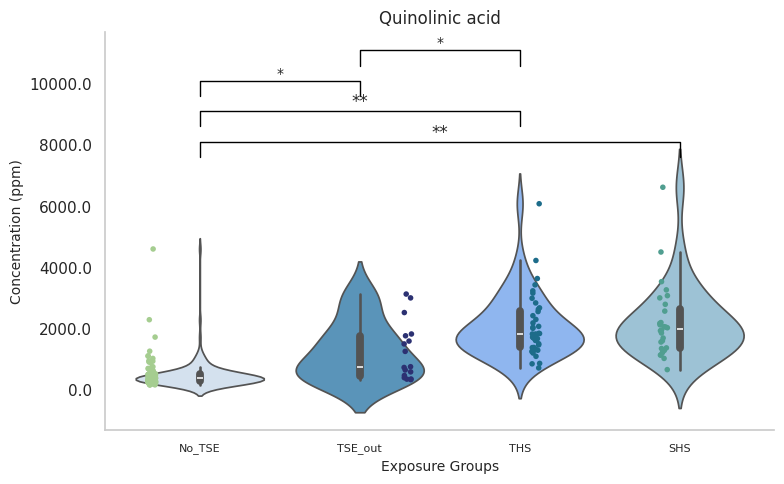

<ipython-input-3-20235222fe70>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


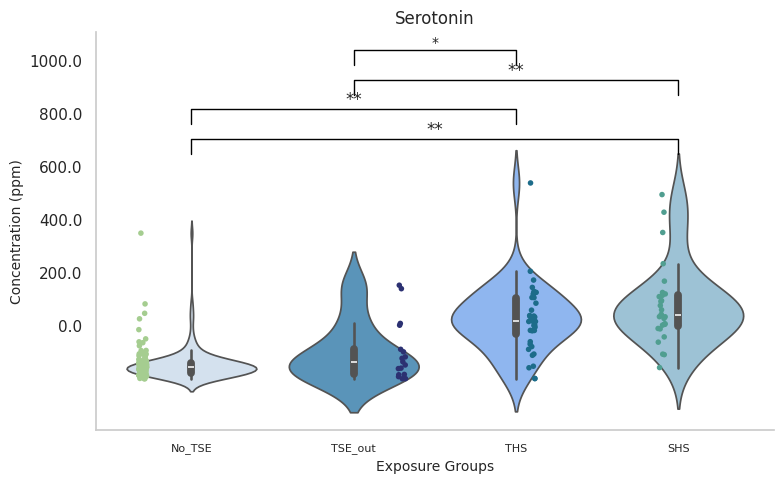

<ipython-input-3-20235222fe70>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


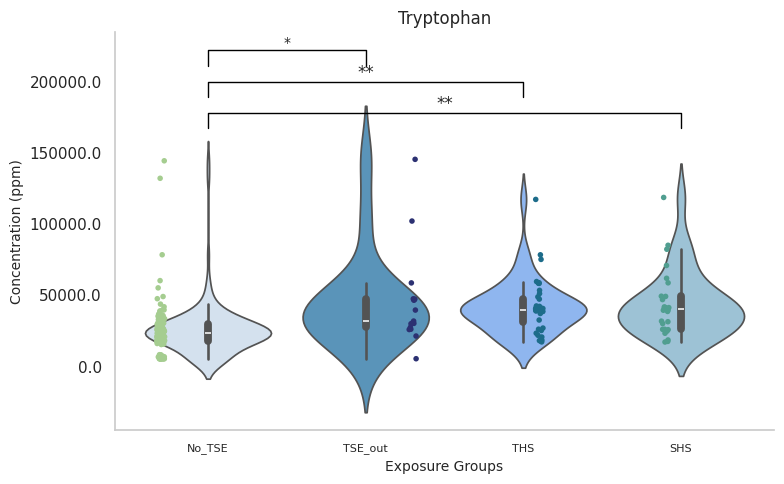

<ipython-input-3-20235222fe70>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


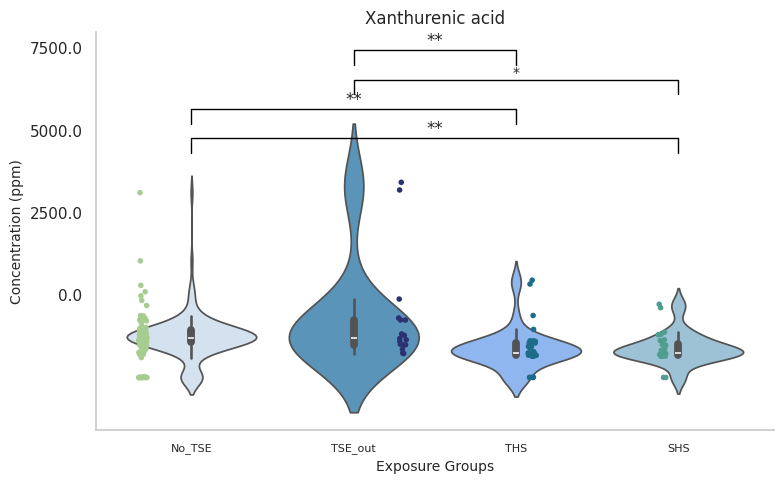

<ipython-input-3-20235222fe70>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


FileNotFoundError: [Errno 2] No such file or directory: '/content/VP_stat_QA/KA.jpg'

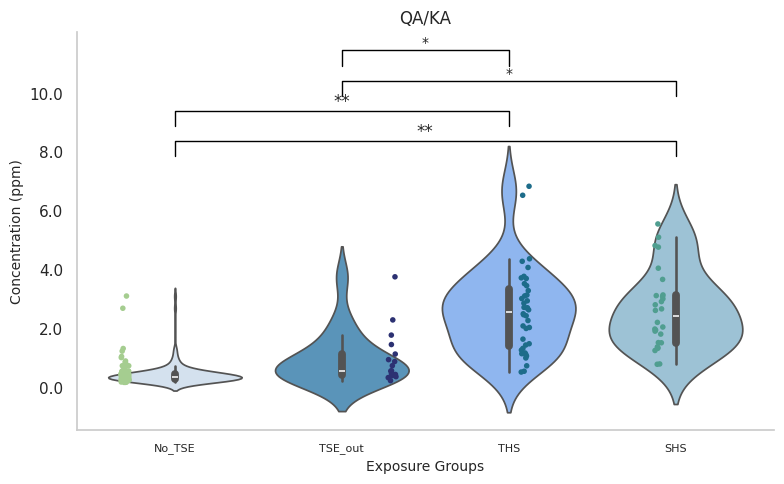

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Define the groups and their mapping
group_order = [0, 3, 2, 1]
group_mapping = {0: "No_TSE", 1: "SHS", 2: "THS", 3: "TSE_out"}
pair_mapping = {
    (0, 1): "No_TSE vs SHS",
    (0, 2): "No_TSE vs THS",
    (0, 3): "No_TSE vs TSE_out",
    (1, 2): "SHS vs THS",
    (1, 3): "SHS vs TSE_out",
    (2, 3): "THS vs TSE_out"
}

# Iterate through the metabolites
sns.set(style="whitegrid", palette="Blues")
palette = sns.color_palette("Blues", 4)
palette[-1] = (0.5, 0.7, 1.0)
reordered_palette = [palette[0], palette[1], palette[3], palette[2]]

met_original2 = met_original.drop(columns=['ID', 'Exposure_Group', 'Groups_encoded'])
for metabolite in met_original2:

    # Filter significant results for the metabolite
    sig_results = final_results_df[final_results_df["Metabolite"] == metabolite]
    significant_pairs = []

    if not sig_results.empty:
        for (group1, group2), col_name in pair_mapping.items():
            p_value = sig_results[col_name].iloc[0]
            if p_value < 0.05:
                significant_pairs.append((group1, group2, p_value))  # Include p-value in the tuple

    # Plot the violin plot
    plt.figure(figsize=(8, 5))
    sns.violinplot(x='Exposure_Group', y=metabolite, data=met_original,
                   hue='Exposure_Group', palette=reordered_palette, order=group_order, legend=False)
    sns.stripplot(x='Exposure_Group', y=metabolite, data=met_original,
                  hue='Exposure_Group', palette='crest', size=4, jitter=True, order=group_order,
                  dodge=True, legend=False)

    # Customizing axis labels
    plt.xticks(ticks=range(len(group_order)), labels=[group_mapping[i] for i in group_order], fontsize=8)
    plt.title(f'{metabolite}', fontsize=12)
    plt.xlabel('Exposure Groups', fontsize=10)
    plt.ylabel('Concentration (ppm)', fontsize=10)

    # Remove negative numbers from y-axis labels
    ax = plt.gca()
    y_labels = ax.get_yticks()
    y_labels = [label if label >= 0 else "" for label in y_labels]  # Remove negative labels
    ax.set_yticklabels(y_labels)

    # Remove gridlines and adjust spines
    sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)
    ax.grid(False)

    # Draw lines and markers for significant pairs
    y_max = met_original[metabolite].max()
    line_height = y_max * 0.15
    for idx, (group1, group2, p_value) in enumerate(significant_pairs):
        x1, x2 = group_order.index(group1), group_order.index(group2)
        y = y_max + (idx + 1) * line_height  # Adjust height for each line
        ax.plot([x1, x1, x2, x2], [y, y + line_height / 2, y + line_height / 2, y], color="black", lw=1)

        # Add appropriate asterisks based on p-value
        if p_value < 0.001:
            ax.text((x1 + x2) / 2, y + line_height / 2, "**", ha="center", va="bottom", fontsize=12)
        elif p_value < 0.05:
            ax.text((x1 + x2) / 2, y + line_height / 2, "*", ha="center", va="bottom", fontsize=10)

    # Save the plot
    plt.tight_layout()
    plt.savefig(f'VP_stat_{metabolite}.jpg')
    plt.show()


In [ ]:
import numpy as np
import pandas as pd

# List of metabolites to analyze
metabolites_list = ['8-oxo-dGUO', '8-OH-guanosine', 'Adenosine', 'Anthranilic', 'Cotinine', 'Dopamine',
                    'Epinephrine', 'GABA', 'Glutamate', 'Glutamine', 'Histamine', 'Kynurenic acid', 'Kynurenine',
                    'Melatonin', 'NNAL', 'Norepinephrine', 'OH-cotinine', 'Quinolinic acid', 'Serotonin',
                    'Tryptophan', 'Xanthurenic acid', 'QA/KA']

# Function to calculate confidence intervals using Bootstrap
def bootstrap_ci(data, n_bootstrap=1000, alpha=0.05):
    boot_means = []
    for _ in range(n_bootstrap):
        boot_sample = np.random.choice(data, size=len(data), replace=True)
        boot_means.append(np.mean(boot_sample))
    lower = np.percentile(boot_means, 100 * (alpha / 2))
    upper = np.percentile(boot_means, 100 * (1 - alpha / 2))
    return lower, upper

# Dictionary to store results
ci_results = []

# Iterate over exposure groups
for group in metabolites['Exposure_Group'].unique():
    group_data = metabolites[metabolites['Exposure_Group'] == group]

    # Collect confidence intervals for each metabolite
    for metabolite in metabolites_list:
        metabolite_data = group_data[metabolite].dropna()
        ci = bootstrap_ci(metabolite_data)
        ci_results.append([group, metabolite, ci[0], ci[1]])

# Create DataFrame for clearer display
ci_df = pd.DataFrame(ci_results, columns=['Exposure Group', 'Metabolite', 'Lower CI', 'Upper CI'])

# Export the DataFrame to Excel
#ci_df.to_excel('confidence_intervals.xlsx', index=False)

print(ci_df)


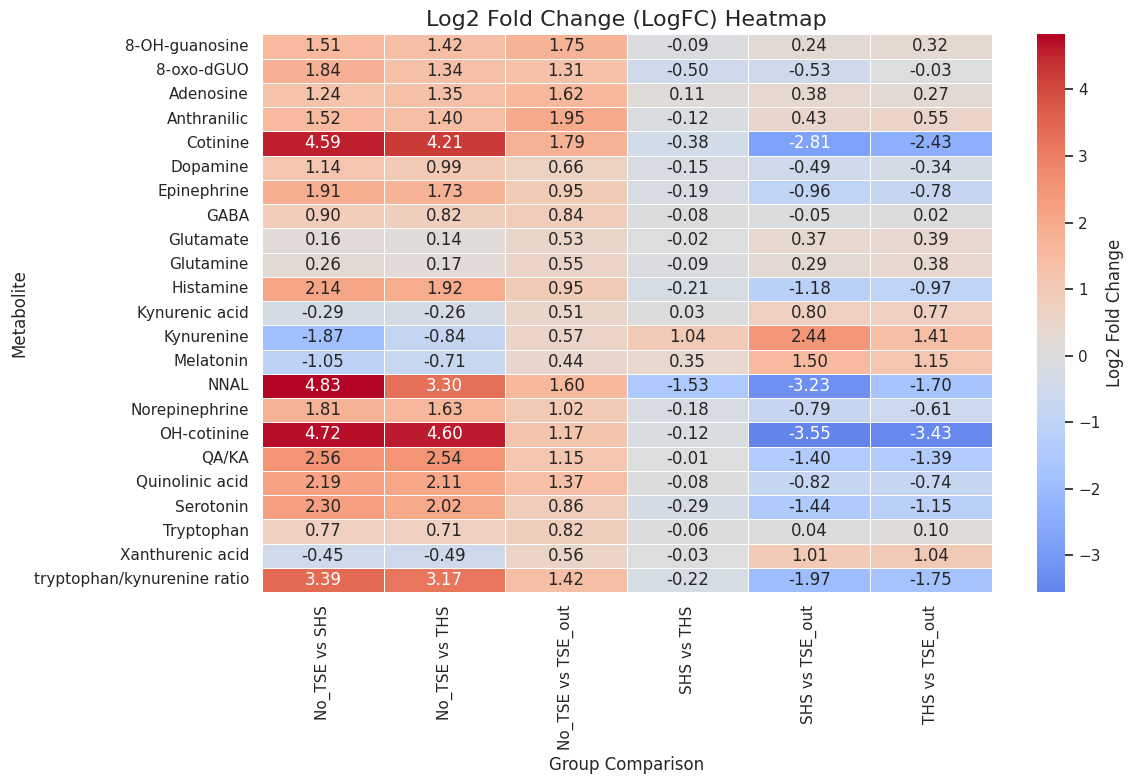

In [ ]:
# Calculate LogFC between exposure groups
logfc_results = []
met_original2['tryptophan/kynurenine ratio'] = met_original2['Tryptophan'] / met_original2['Kynurenine']
met_original['tryptophan/kynurenine ratio'] = met_original['Tryptophan'] / met_original['Kynurenine']

# Iterate through metabolites
for metabolite in met_original2:
    # Calculate mean concentration for each group
    group_means = met_original.groupby('Exposure_Group')[metabolite].mean()

    # Compute LogFC for each pair of groups
    for (group1, group2), pair_name in pair_mapping.items():
        mean1 = group_means[group1]
        mean2 = group_means[group2]

        # Avoid division by zero
        if mean1 > 0 and mean2 > 0:
            logfc = np.log2(mean2 / mean1)
            logfc_results.append({
                "Metabolite": metabolite,
                "Comparison": pair_name,
                "LogFC": logfc
            })

# Convert results to a DataFrame
logfc_df = pd.DataFrame(logfc_results)

# Save LogFC results to a CSV file for reference
logfc_df.to_csv("LogFC_results.csv", index=False)

# Display a preview of the LogFC results
#print(logfc_df)

# Pivot the LogFC DataFrame to create a heatmap-compatible format
logfc_heatmap_data = logfc_df.pivot(index="Metabolite", columns="Comparison", values="LogFC")

# Set up the figure and axis
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(
    logfc_heatmap_data,
    cmap="coolwarm",
    center=0,  # Center the colormap around zero (no change)
    annot=True,  # Annotate cells with the LogFC values
    fmt=".2f",  # Format for annotations
    linewidths=0.5,  # Add gridlines between cells
    cbar_kws={'label': 'Log2 Fold Change'}  # Colorbar label
)

# Customize plot appearance
plt.title("Log2 Fold Change (LogFC) Heatmap", fontsize=16)
plt.xlabel("Group Comparison", fontsize=12)
plt.ylabel("Metabolite", fontsize=12)

# Save the heatmap as an image
plt.tight_layout()
plt.savefig("LogFC_Heatmap.jpg")

# Show the heatmap
plt.show()